# Data Extraction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df1 = pd.read_csv('/content/spam_ham_dataset.csv', engine='python')
df1

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
df1.drop(columns=['Unnamed: 0','label'],inplace=True)
df1.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df2 = pd.read_csv('/content/spam.csv',encoding='latin-1')
df2

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df2.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df2.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df2['label_num'] = df2['v1'].apply(lambda x:1 if x=='spam' else 0)
df2.head()

,v1,v2,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df2.drop(columns=['v1'],inplace=True)
df2.head()

,v2,label_num
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# Ensure columns are consistent before concatenation
df2.rename(columns={'v2': 'text'}, inplace=True)

# Vertically stack the two dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

# Display the last few rows to see data from the second dataframe
display(combined_df.tail())

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


,text,label_num
10738,This is the 2nd time we have tried 2 contact u...,1
10739,Will Ì_ b going to esplanade fr home?,0
10740,"Pity, * was in mood for that. So...any other s...",0
10741,The guy did some bitching but I acted like i'd...,0
10742,Rofl. Its true to its name,0


In the code above:
- We first rename the 'v2' column in `df2` to 'text' to match the column name in `df1`. This is important for vertical stacking.
- `pd.concat([df1, df2], ignore_index=True)` concatenates `df1` and `df2` vertically.
- `ignore_index=True` resets the index of the resulting dataframe.
- `display(combined_df.head())` shows the top rows, which will be from `df1`.
- `display(combined_df.tail())` shows the bottom rows, which will be from `df2`.

# EDA

In [ ]:
combined_df.shape

(10743, 2)

In [ ]:
combined_df['label_num'].value_counts()

,count
label_num,
0,8497
1,2246


**Imbalanced Data**

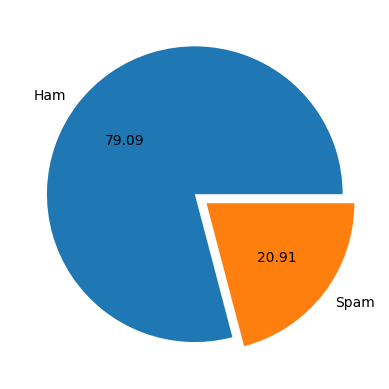

In [ ]:
plt.pie(combined_df['label_num'].value_counts(),labels=['Ham','Spam'],autopct='%0.2f',explode=[0,0.1])
plt.show()

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
combined_df['characters'] = combined_df['text'].apply(lambda x:len(x))
combined_df['words'] = combined_df['text'].apply(lambda x:len(word_tokenize(x)))
combined_df['sentences'] = combined_df['text'].apply(lambda x:len(sent_tokenize(x)))
combined_df.head()

,text,label_num,characters,words,sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


<Axes: xlabel='sentences', ylabel='Count'>

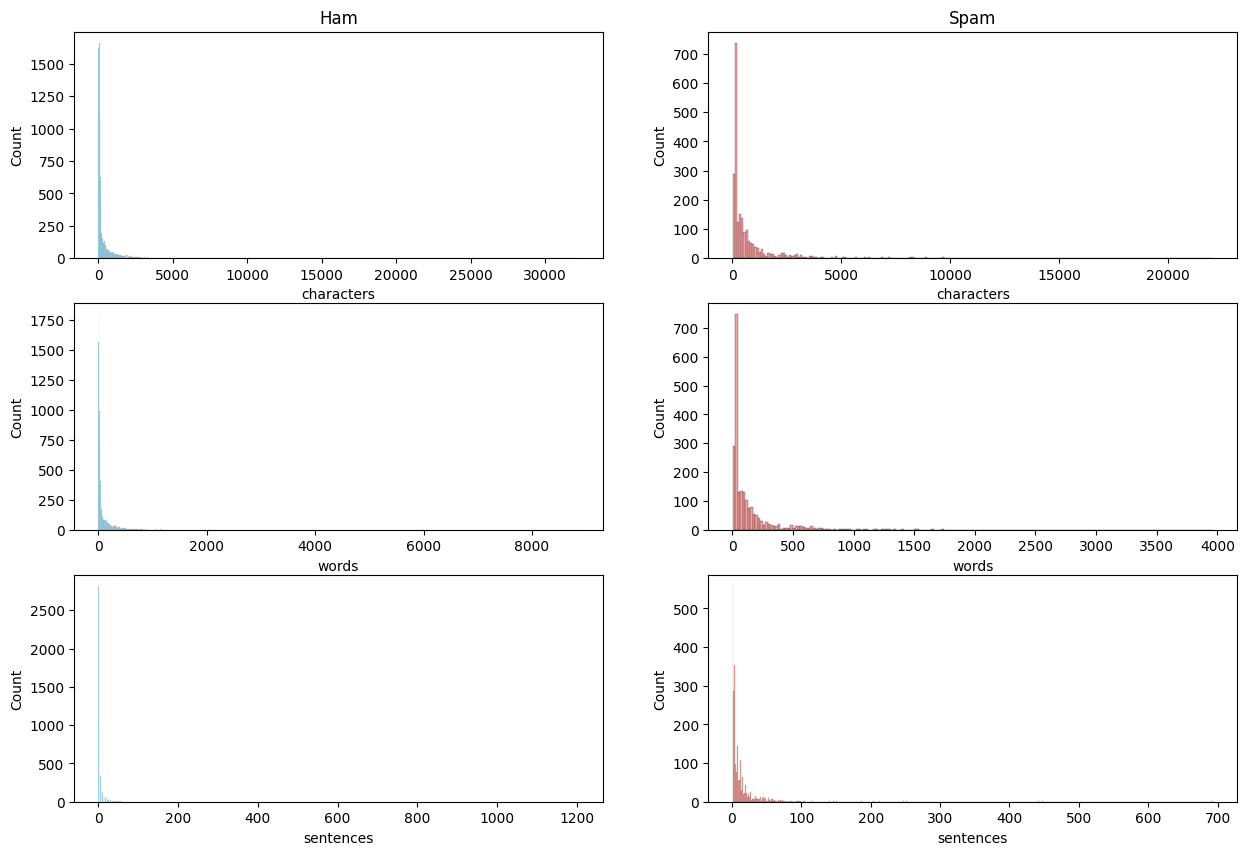

In [78]:
fig,ax = plt.subplots(3,2,figsize=(15,10))
sns.histplot(combined_df[combined_df['label_num']==0]['characters'],ax=ax[0,0],color='skyblue')
ax[0][0].set_title('Ham')
sns.histplot(combined_df[combined_df['label_num']==1]['characters'],ax=ax[0,1],color='lightcoral')
ax[0][1].set_title('Spam')
sns.histplot(combined_df[combined_df['label_num']==0]['words'],ax=ax[1,0],color='skyblue')
sns.histplot(combined_df[combined_df['label_num']==1]['words'],ax=ax[1,1],color='lightcoral')
sns.histplot(combined_df[combined_df['label_num']==0]['sentences'],ax=ax[2,0],color='skyblue')
sns.histplot(combined_df[combined_df['label_num']==1]['sentences'],ax=ax[2,1],color='lightcoral')

# Text Cleaning

In [ ]:
for i in range(10):
  print(combined_df['text'][i])
  print('\n')

1. Punctuations,numbers and extra spaces removal
2. Stopwords removal
3. Stemming

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

swords = stopwords.words('english')
ps = PorterStemmer()

def text_preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z]',' ',text)
  text = re.sub(r'\s+',' ',text)
  text = re.sub(r'subject','',text)

  new_text = []
  for word in text.split():
    if word not in swords:
      new_text.append(ps.stem(word))
  text = " ".join(new_text)
  new_text.clear()
  return text

In [ ]:
combined_df['modified_text'] = combined_df['text'].apply(text_preprocess)
combined_df

# Vectorization

In [ ]:
bow = CountVectorizer(max_features=3000)
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
x_bow = bow.fit_transform(combined_df['modified_text']).toarray()
x_tfidf = tfidf.fit_transform(combined_df['modified_text']).toarray()
y = combined_df['label_num'].values

In [ ]:
x_bow[0,:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
x_tfidf[0,:50]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.17554942,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
from sklearn.model_selection import train_test_split
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(x_bow,y,test_size=0.2,random_state=42)
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x_tfidf,y,test_size=0.2,random_state=42)

# Model Building and Evaluation: ML Approach

In [ ]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 1.4 MB/s eta 0:00:00


In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='liblinear',penalty='l1')
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier(n_estimators=50,random_state=2)
svm = SVC(kernel='sigmoid',gamma=1.0, probability=True)
xgb = XGBClassifier(n_estimators=50,random_state=2)
knn = KNeighborsClassifier()

## Using BoW

In [ ]:
gnb.fit(x_train_bow,y_train_bow)
y_pred_bow = gnb.predict(x_test_bow)
print("accuracy",accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))
print("f1 score",f1_score(y_test_bow,y_pred_bow))

accuracy 0.6421591437878083
[[966 747]
 [ 22 414]]
precision 0.35658914728682173
f1 score 0.5184721352536005


In [ ]:
mnb.fit(x_train_bow,y_train_bow)
y_pred_bow = mnb.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))
print("f1 score",f1_score(y_test_bow,y_pred_bow))

0.8897161470451372
[[1510  203]
 [  34  402]]
precision 0.6644628099173554
f1 score 0.7723342939481268


In [ ]:
bnb.fit(x_train_bow,y_train_bow)
y_pred_bow = bnb.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))
print("f1 score",f1_score(y_test_bow,y_pred_bow))

0.8990228013029316
[[1654   59]
 [ 158  278]]
precision 0.8249258160237388
f1 score 0.7192755498059509


In [ ]:
lr.fit(x_train_bow,y_train_bow)
y_pred_bow = lr.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))
print("f1 score",f1_score(y_test_bow,y_pred_bow))

0.952536063285249
[[1694   19]
 [  83  353]]
precision 0.9489247311827957
f1 score 0.8737623762376238


In [ ]:
dt.fit(x_train_bow,y_train_bow)
y_pred_bow = dt.predict(x_test_bow)
print(accuracy_score(y_test_bow,y_pred_bow))
print(confusion_matrix(y_test_bow,y_pred_bow))
print("precision",precision_score(y_test_bow,y_pred_bow))
print("f1 score",f1_score(y_test_bow,y_pred_bow))

0.8738948348068869
[[1679   34]
 [ 237  199]]
precision 0.8540772532188842
f1 score 0.5949177877428998


In [ ]:
models = {'GaussianNB':gnb,'MultinomialNB':mnb,'BernoulliNB':bnb,'LogisticRegression':lr,'DecisionTreeClassifier':dt,'RandomForestClassifier':rf,'SVC':svm,'XGBClassifier':xgb,'KNeighborsClassifier':knn}

def model_evaluation(x_train,x_test,y_train,y_test,models):
  accuracy_scores = []
  precision_scores = []
  f1_scores = []
  for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test,y_pred))
    f1_scores.append(f1_score(y_test,y_pred))

  return pd.DataFrame({'models':models.keys(),'accuracy_score':accuracy_scores,'precision_score':precision_scores,'f1_score':f1_scores})

In [ ]:
model_evaluation(x_train_bow,x_test_bow,y_train_bow,y_test_bow,models)

,models,accuracy_score,precision_score,f1_score
0,GaussianNB,0.642159,0.356589,0.518472
1,MultinomialNB,0.889716,0.664463,0.772334
2,BernoulliNB,0.899023,0.824926,0.719276
3,LogisticRegression,0.952536,0.948925,0.873762
4,DecisionTreeClassifier,0.873430,0.850427,0.594030
5,RandomForestClassifier,0.957655,0.945736,0.889429
6,SVC,0.817590,0.548889,0.557562
7,XGBClassifier,0.939972,0.937322,0.836086
8,KNeighborsClassifier,0.876221,0.904762,0.588235


## Using TF-IDF

In [ ]:
model_evaluation(x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf,models)

,models,accuracy_score,precision_score,f1_score
0,GaussianNB,0.768730,0.465301,0.622053
1,MultinomialNB,0.948348,0.907268,0.867066
2,BernoulliNB,0.899023,0.824926,0.719276
3,LogisticRegression,0.939507,0.922652,0.837093
4,DecisionTreeClassifier,0.872964,0.868778,0.584475
5,RandomForestClassifier,0.953467,0.939791,0.877751
6,SVC,0.952536,0.939474,0.875000
7,XGBClassifier,0.942764,0.938375,0.844893
8,KNeighborsClassifier,0.861331,0.985915,0.484429


**Using VotingClassifier with Best Models and tfidf**


In [ ]:
# voting = soft --> average
# voting = hard --> majority
from sklearn.ensemble import VotingClassifier
model1 = VotingClassifier(estimators=[
    ('MultinomialNB', mnb),
    ('LogisticRegression', lr),
    ('RandomForestClassifier', rf),
    ('SVC', svm),
    ('XGBClassifier', xgb),
    #('KNeighborsClassifier', knn)
], voting='soft')


model1.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = model1.predict(x_test_tfidf)
print("accuracy",accuracy_score(y_test_tfidf, y_pred_tfidf))
print(confusion_matrix(y_test_tfidf, y_pred_tfidf))
print("precision", precision_score(y_test_tfidf, y_pred_tfidf))
print("f1 score",f1_score(y_test_bow,y_pred_bow))

accuracy 0.9562587249883667
[[1697   16]
 [  78  358]]
precision 0.9572192513368984
f1 score 0.5949177877428998


# Model Building and Evaluation: DL Approach

## Tokenization and Padding

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 824.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 156.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 140.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.6 MB/s eta 0:00:00


**Number of words in spam and ham**

In [ ]:
combined_df[combined_df['label_num']==1]['modified_text'].apply(lambda x:len(x.split()))

,modified_text
3,43
7,71
10,640
11,38
13,48
...,...
10708,13
10711,23
10718,18
10737,16


In [ ]:
combined_df[combined_df['label_num']==0]['modified_text'].apply(lambda x:len(x.split()))

,modified_text
0,30
1,10
2,210
4,28
5,41
...,...
10736,2
10739,5
10740,3
10741,13


In [ ]:
print("Spam words count mean: ",combined_df[combined_df['label_num']==1]['modified_text'].apply(lambda x:len(x.split())).mean())
print("Ham words count mean: ",combined_df[combined_df['label_num']==0]['modified_text'].apply(lambda x:len(x.split())).mean())

Spam words count mean:  84.39626001780944
Ham words count mean:  41.8816052724491


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


In [ ]:
vocab_size = 3000
max_len = 120

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token='OOV')
tokenizer.fit_on_texts(combined_df['modified_text'])

In [ ]:
X_tok = tokenizer.texts_to_sequences(combined_df['modified_text'])
y_tok = combined_df['label_num'].values

In [ ]:
X_tok[1]

[13, 42, 187, 32, 39, 72, 1731, 51, 1731, 51]

**Padding to max_len=120**

In [ ]:
X_tok = pad_sequences(X_tok,maxlen=max_len,padding='post',truncating='post')
X_tok[:3]

array([[   4,  845,    9,   56,  202, 1410,  326, 1605,   57,  385,  110,
          17,    7,    1,  469,  114,   24,  537,  442,  556,  114,  156,
        1430,    8,  331,   33,   14, 1151, 1687,  881,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  13,   42,  187,   32,   39,   72, 1731,   51, 1731,   51,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,

**Train and test dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train_tok,x_test_tok,y_train_tok,y_test_tok = train_test_split(X_tok,y_tok,test_size=0.2,random_state=42)

**Validation Dataset**

In [ ]:
x_train_final,x_val,y_train_final,y_val = train_test_split(x_train_tok,y_train_tok,test_size=0.15,random_state=42)

## Model Building

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input,Embedding,LSTM,GRU,Dropout,Dense

In [ ]:
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=vocab_size,output_dim=200))
model.add(LSTM(150,return_sequences=False))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 120, 200)       │       600,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 150)            │       210,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         9,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 820,329 (3.13 MB)

 Trainable params: 820,329 (3.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
    start_from_epoch=5,
)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train_final,y_train_final,epochs=25,validation_data=(x_val,y_val),callbacks=[early_stop])

Epoch 1/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.7950 - loss: 0.5158 - val_accuracy: 0.8101 - val_loss: 0.4810
Epoch 2/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.8176 - loss: 0.4588 - val_accuracy: 0.8171 - val_loss: 0.4217
Epoch 3/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8229 - loss: 0.4231 - val_accuracy: 0.8163 - val_loss: 0.4377
Epoch 4/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8277 - loss: 0.4220 - val_accuracy: 0.8853 - val_loss: 0.3890
Epoch 5/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9258 - loss: 0.2333 - val_accuracy: 0.9636 - val_loss: 0.1090
Epoch 6/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9810 - loss: 0.0686 - val_accuracy: 0.9597 - val_loss: 0.1209
Epoch 7/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9890 - loss: 0.0417 - val_accuracy: 0.9674 - val_loss: 0.1008
Epoch 8/25
229/229 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.9919 - loss: 0.0305 - 

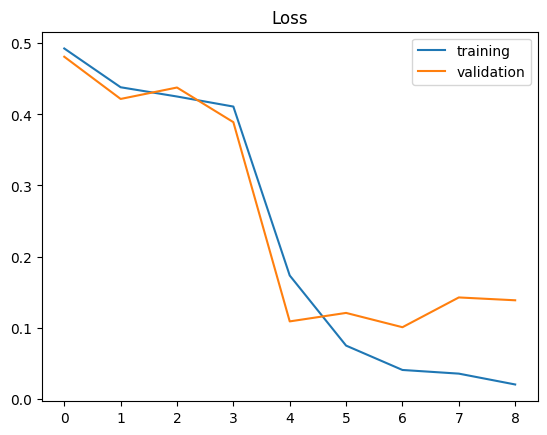

In [ ]:
plt.plot(model.history.history['loss'],label='training')
plt.plot(model.history.history['val_loss'],label='validation')
plt.legend()
plt.title("Loss")
plt.show()

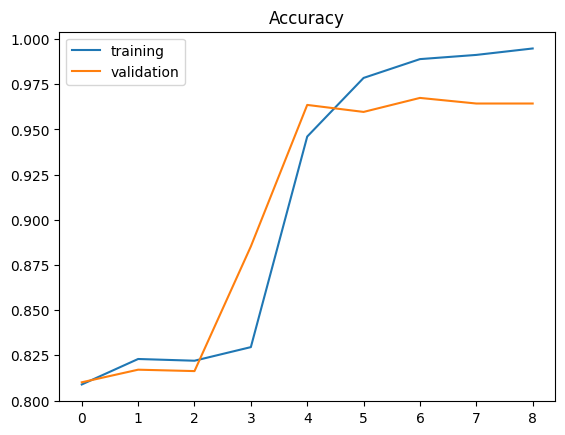

In [ ]:
plt.plot(model.history.history['accuracy'],label='training')
plt.plot(model.history.history['val_accuracy'],label='validation')
plt.legend()
plt.title("Accuracy")
plt.show()

In [72]:
def predict(text):
  text = text.lower()
  text = text_preprocess(text)
  text = tokenizer.texts_to_sequences([text]) # Wrap text in a list
  text = pad_sequences(text,maxlen=max_len,padding='post',truncating='post')
  pred = model.predict(text)
  if pred[0][0] > 0.5:
    print("Spam")
  else:
    print("Not Spam")

In [73]:
predict("Your Amazon order #2847392 has been shipped. Expected delivery: tomorrow.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Not Spam


In [ ]:
y_pred = model.predict(x_test_tok)
y_pred = [1 if x>=0.5 else 0 for x in y_pred]

68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
print("Accuracy score:",accuracy_score(y_test_tok,y_pred))
print("Precision score:",precision_score(y_test_tok,y_pred))
print("Confusion matrix:\n",confusion_matrix(y_test_tok,y_pred))
print("f1 score",f1_score(y_test_tok,y_pred))

Accuracy score: 0.9641693811074918
Precision score: 0.9304556354916067
Confusion matrix:
 [[1684   29]
 [  48  388]]
f1 score 0.9097303634232122


# Prediction

* **ML model - model1**
* **DL model - model**


In [77]:
for i in range(10):
  sms = input("Enter a message: ")
  text = sms
  sms = text_preprocess(sms)
  sms = tfidf.transform([sms]).toarray()
  ml_pred = model1.predict(sms)
  if ml_pred==0:
    print("ML model: Not Spam")
  else:
    print("ML Model: Spam")
  print("DL model:")
  predict(text)
  print('\n')

Enter a message: "URGENT: Your bank account will be suspended today. Verify immediately at secure-bankupdate.com"
ML Model: Spam
DL model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Spam


Enter a message: "You have been selected for a free Netflix subscription for 1 year. Reply YES to activate."
ML Model: Spam
DL model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Spam


Enter a message: "Congratulations! You’ve won a ₹10,000 Amazon voucher. Click here to claim: http://bit.ly/win-now "
ML Model: Spam
DL model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Spam


Enter a message: "Claim your FREE iPhone 15 now! Limited offer, tap the link below."
ML Model: Spam
DL model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Spam


Enter a message: "Hey, are we still meeting at 6 for dinner?"
ML model: Not Spam
DL model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Not Spam


Enter a message: "Please send the project files before tomorrow’s review."
ML model: Not Spam
DL model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Not Spam


En